<a href="https://colab.research.google.com/github/KristinaMilberg/cs102/blob/homework06/%D0%97%D0%B0%D1%89%D0%B8%D1%82%D0%B0_%D0%9B%D0%A03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice
pd.set_option('display.max_columns', None)



Воспользуемся стандартным датасетом `titanic`. Загрузим его из модуля `seaborn`. Источник данных: https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

In [ ]:
data = sns.load_dataset("titanic") # загружаем датасет
data.head() # выводим первые 5 строк

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Номер варианта – ваш номер в списке группы в ИСУ.

In [ ]:
pd.DataFrame([[choice(range(1,6)), choice(range(1,6))] for _ in range(26)], columns=["Задание 1", "Задание 2"]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Задание 1,1,4,1,2,3,5,3,1,3,5,1,2,4,2,1,4,2,2,3,4,4,1,1,5,5,2
Задание 2,3,5,4,4,3,4,4,2,5,4,3,5,2,1,3,4,4,5,5,1,2,2,4,2,3,1


## Задание 1 (согласно варианту)

1. Сколько **детей** из города **Southampton**, занимавших каюту в **третьем классе**, **выжили**? Выведите строки таблицы, удовлетворяющие условию. Найдите средний возраст (медиану) девочек.

In [ ]:
# PUT YOUR CODE HERE

2. Кого среди **выживших**, занимавших каюту на палубе **B**, больше: мужчин, женщин или детей? Во сколько раз больше?

In [7]:
data = sns.load_dataset("titanic")
# отбираем пассажиров, которые занимали каюту на палубе B
deck_b = data[(data['deck'] == 'B') & (data['alive'] == 'yes')]
# разделяем пассажиров на категории: мужчины, женщины и дети
men = deck_b[(deck_b['sex'] == 'male') & (deck_b['age'] >= 18)]
women = deck_b[(deck_b['sex'] == 'female') & (deck_b['age'] >= 18)]
children = deck_b[deck_b['age'] < 18]
# определяем количество мужчин, женщин и детей, которые выжили
num_men = len(men[men['alive'] == 'yes'])
num_women = len(women[women['alive'] == 'yes'])
num_children = len(children[children['alive'] == 'yes'])
# выводим результаты
print(f'Кол-во мужчин: {num_men}')
print(f'Кол-во женщин: {num_women}')
print(f'Кол-во детей: {num_children}')
# определяем, кого из них больше
if num_men > num_women and num_men > num_children:
    print(f'Выживших мужчин больше чем детей и женщин в {num_men/num_women:.2f} раз')
elif num_women > num_men and num_women > num_children:
    print(f'Выживших женщин больше чем мужчин и детей в {num_women/num_men:.2f} раз')
else:
    print(f'Выживших детей больше чем мужчин и женщин в {num_children/num_men:.2f} раз')

Кол-во мужчин: 7
Кол-во женщин: 21
Кол-во детей: 6
Выживших женщин больше чем мужчин и детей в 3.00 раз


3. C какой палубы (столбец `deck`) больше погибших, чем спасшихся? Если таких палуб несколько, выведите все.

In [ ]:
# PUT YOUR CODE HERE

4. Из какого города спаслось больше одиноких мужчин, чем женщин? Из какого наоборот?

In [ ]:
# PUT YOUR CODE HERE

5. Какая средняя цена за билет в каждом классе? Существенно ли различается цена за билет для взрослых и для детей в каждом классе?

In [ ]:
# PUT YOUR CODE HERE

## Задание 2 (согласно варианту)

1. Покажите на ящиковой диаграмме распределение возраста погибших и спасшихся пассажиров по палубам.

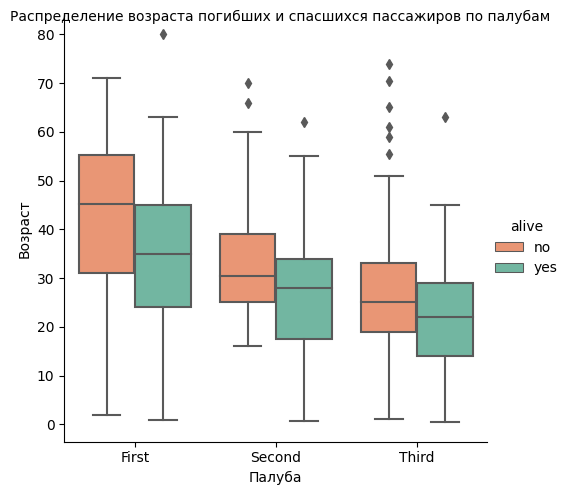

In [16]:
# отбираем только тех пассажиров, которые путешествовали на корабле
data = data.dropna(subset=['embarked', 'class'])
# создаем ящиковые диаграммы для распределения возраста по палубам
palette = {'yes': '#66c2a5', 'no': '#fc8d62'}
g = sns.catplot(x='class', y='age', hue='alive', kind='box', data=data, palette=palette)
# настраиваем заголовок и метки осей
g.fig.suptitle('Распределение возраста погибших и спасшихся пассажиров по палубам', fontsize=10)
g.set_xlabels('Палуба')
g.set_ylabels('Возраст')
# показываем график
plt.show()

2. Покажите распределение цены за билет у погибших и спасшихся пассажиров из каждого города.

In [ ]:
# PUT YOUR CODE HERE

3. Покажите на графике, сколько детей из каждого города отмечено в датасете. 

In [ ]:
# PUT YOUR CODE HERE

4. На диаграмме с группировкой покажите, к каким возрастным группам принадлежат пассажиры из каждого города? Возрастной группой считаем каждые десять лет: 0-10, 11-20, 21-30 и т.д.

In [ ]:
# PUT YOUR CODE HERE

5. На круговой диаграмме с группировкой покажите, как распределилось число поигбших среди женщин и детей с каждой палубы.

In [ ]:
# PUT YOUR CODE HERE